In [1]:
import pandas as pd

# Read only the first 100 rows from your CSV file
first_100_rows = pd.read_csv("lightcurve_features_26.csv", nrows=100)

# To view the data, you can print the first few rows
print(first_100_rows.head())

# To save the new data to a new CSV file
first_100_rows.to_csv("first_100_lightcurve_features_26.csv", index=False)


       object       mean  weighted_mean  standard_deviation     median  \
0    V479 And  17.268163      17.236716            0.180454  17.273849   
1   V1309 Ori  15.720073      15.634069            0.449468  15.607049   
2      AI Tri  16.339606      16.129012            0.641042  16.161560   
3      MQ Dra  17.466180      17.337143            0.364589  17.434200   
4  J2048+0050  18.698472      18.666318            0.148085  18.703554   

   amplitude  beyond_1_std     cusum  inter_percentile_range_10  kurtosis  \
0   0.666252      0.328125  0.069825                   0.460431 -0.035883   
1   1.007579      0.246479  0.091691                   1.249109  0.613096   
2   1.392405      0.314172  0.314640                   1.735063 -0.395987   
3   0.712118      0.456381  0.050537                   0.961357 -1.401971   
4   0.457648      0.323529  0.235844                   0.393805 -0.192066   

   ...  magnitude_percentage_ratio_20_10  maximum_slope  \
0  ...                          0

In [5]:
import pandas as pd
df=pd.read_csv('first_100_lightcurve_features_26.csv')
print(df.shape)

(100, 27)


In [6]:
print(df.head(100))

        object       mean  weighted_mean  standard_deviation     median  \
0     V479 And  17.268163      17.236716            0.180454  17.273849   
1    V1309 Ori  15.720073      15.634069            0.449468  15.607049   
2       AI Tri  16.339606      16.129012            0.641042  16.161560   
3       MQ Dra  17.466180      17.337143            0.364589  17.434200   
4   J2048+0050  18.698472      18.666318            0.148085  18.703554   
..         ...        ...            ...                 ...        ...   
95      HY Leo  17.168732      16.717989            0.834567  17.019226   
96   V1323 Her  17.617775      17.422446            0.567169  17.551816   
97    V418 Gem  16.905293      16.891739            0.130254  16.905872   
98   V2306 Cyg  15.869141      15.860906            0.180194  15.848884   
99      GI Mon  16.540179      16.514128            0.208614  16.522777   

    amplitude  beyond_1_std     cusum  inter_percentile_range_10   kurtosis  \
0    0.666252      0

In [7]:
import pandas as pd

# Load your parquet file
df_pos= pd.read_csv("first_100_lightcurve_features_26.csv")

# Check shape and columns
print(df_pos.shape)
print(df_pos.columns)

(100, 27)
Index(['object', 'mean', 'weighted_mean', 'standard_deviation', 'median',
       'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10',
       'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew',
       'stetson_K'],
      dtype='object')


In [8]:
features_pos = df_pos.drop(columns=['object_name'], errors='ignore')
features_pos_numeric = features_pos.select_dtypes(include='number')
corr_pos = features_pos_numeric.corr()

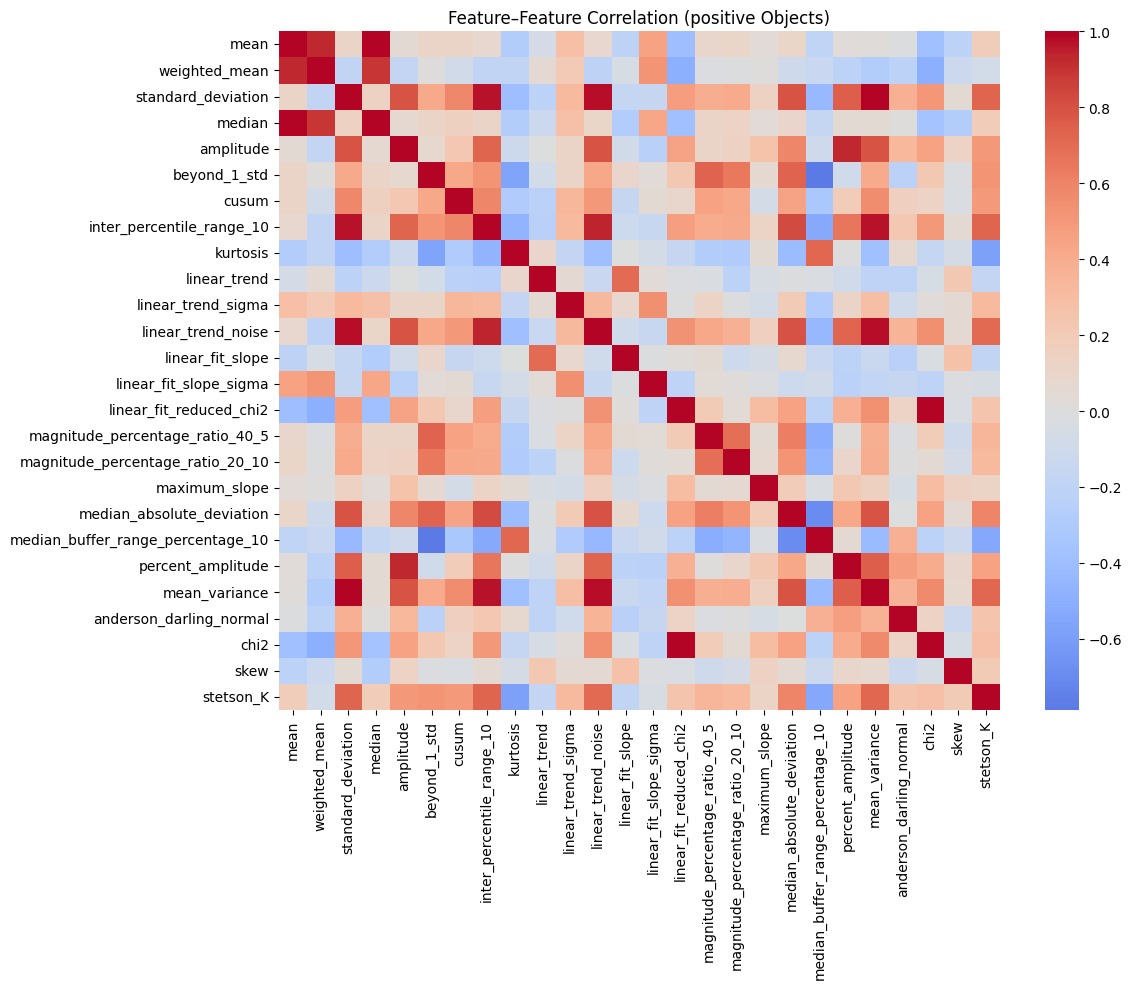

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_pos, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (positive Objects)')
plt.tight_layout()
plt.show()

In [27]:
import pandas as pd

# Load your parquet file
df_neg_1= pd.read_parquet("negative_subset_1.parquet")

# Check shape and columns
print(df_neg_1.shape)
print(df_neg_1.columns)


(100, 28)
Index(['object', 'mean', 'weighted_mean', 'standard_deviation', 'median',
       'amplitude', 'beyond_1_std', 'cusum', 'inter_percentile_range_10',
       'kurtosis', 'linear_trend', 'linear_trend_sigma', 'linear_trend_noise',
       'linear_fit_slope', 'linear_fit_slope_sigma', 'linear_fit_reduced_chi2',
       'magnitude_percentage_ratio_40_5', 'magnitude_percentage_ratio_20_10',
       'maximum_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage_10', 'percent_amplitude',
       'mean_variance', 'anderson_darling_normal', 'chi2', 'skew', 'stetson_K',
       'cluster'],
      dtype='object')


In [30]:
features_neg_1 = df_pos.drop(columns=['object_name','clusters'], errors='ignore')
features_neg_1_numeric = features_pos.select_dtypes(include='number')
corr_neg_1 = features_neg_1_numeric.corr()

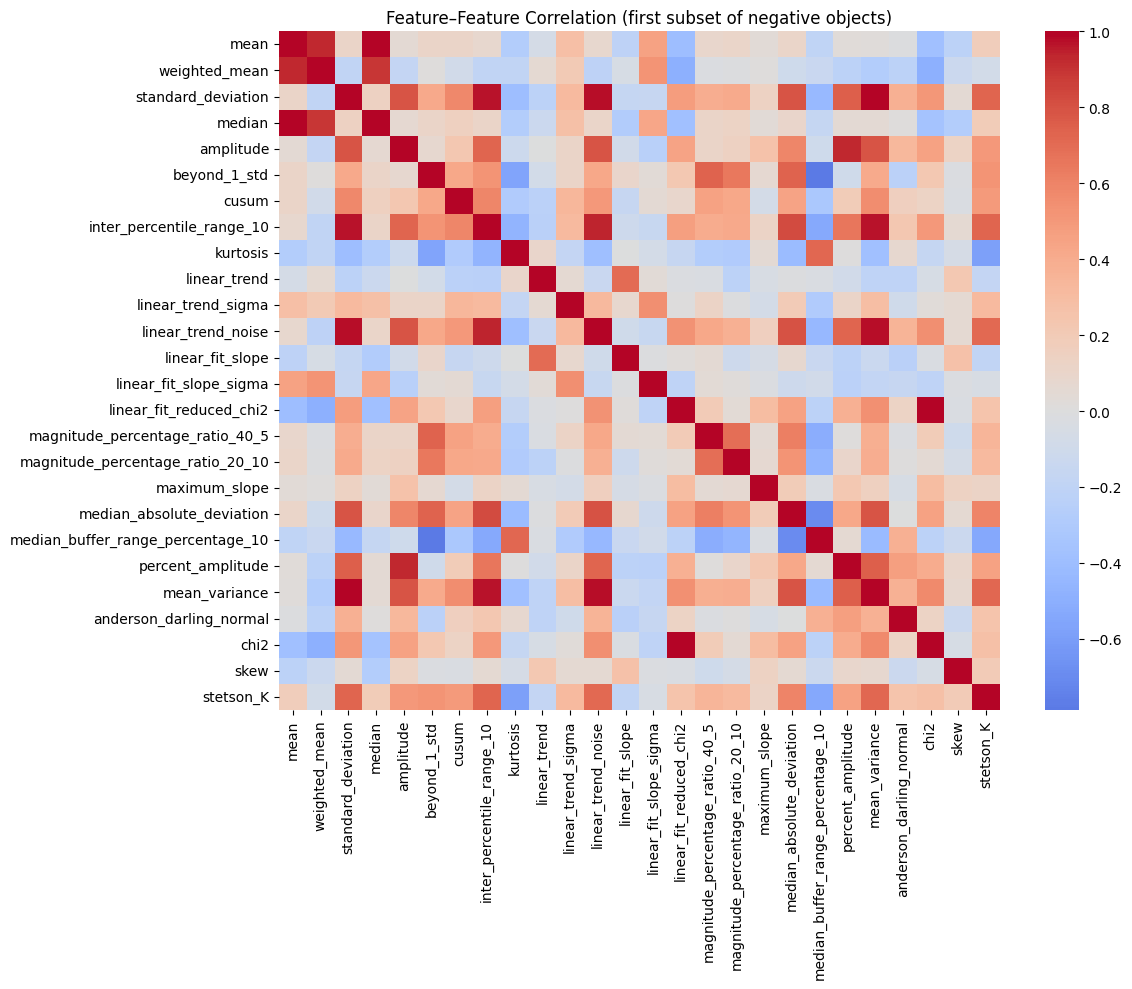

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_pos, cmap='coolwarm', center=0)
plt.title('Feature–Feature Correlation (first subset of negative objects)')
plt.tight_layout()
plt.show()

In [35]:
corr_diff_1 =  corr_neg_1-corr_pos 

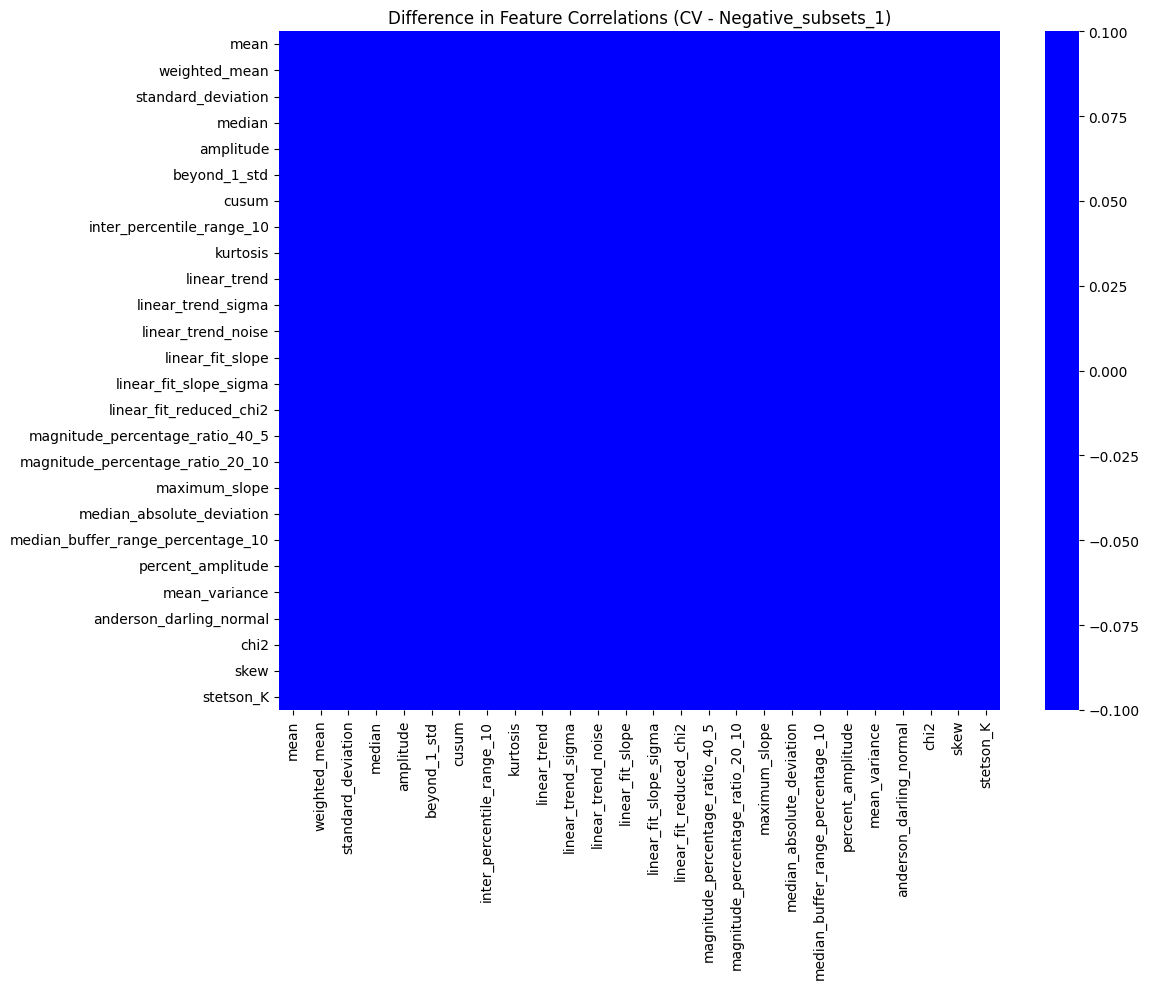

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff_1, cmap='bwr', center=0)
plt.title('Difference in Feature Correlations (CV - Negative_subsets_1)')
plt.tight_layout()
plt.show()

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
neg_files = [f"negative_subset_{i}.parquet" for i in range(1, 12)]

In [39]:
#Loop over each negative subset ===
for file in neg_files:
    if not os.path.exists(file):
        print(f"⚠️ Skipping {file} (not found)")
        continue

In [47]:
df_pos = pd.read_csv("lightcurve_features_26.csv")

In [48]:
features_pos = df_pos.drop(columns=['object_name'], errors='ignore')
features_pos_numeric = features_pos.select_dtypes(include='number')
corr_pos = features_pos_numeric.corr()

In [54]:
neg_files = [f"negative_subset_{i}.parquet" for i in range(1, 12)]

In [55]:
#Loop over each negative subset ===
for file in neg_files:
    if not os.path.exists(file):
        print(f"⚠️ Skipping {file} (not found)")
        continue

In [56]:
 df_neg = pd.read_parquet(file)
    features_neg = df_neg.drop(columns=['object_name', 'clusters'], errors='ignore')
    features_neg_numeric = features_neg.select_dtypes(include='number')
    corr_neg = features_neg_numeric.corr()

IndentationError: unexpected indent (187514498.py, line 2)